## Case Study: Excel Reporting

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('../sales_data/new/January.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9493 entries, 0 to 9492
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    9493 non-null   object        
 1   store             9493 non-null   object        
 2   status            9493 non-null   object        
 3   transaction_date  9493 non-null   datetime64[ns]
 4   plan              9493 non-null   object        
 5   contract_type     9493 non-null   object        
 6   amount            9493 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 519.3+ KB


## Reading and Writing Excel Files with pandas 

In [4]:
df = pd.read_excel('../xl/stores.xlsx',sheet_name='2019', skiprows=1, usecols='B:F')
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,MISSING
2,Chicago,4,Katelin,2020-01-31,NaN
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Store      6 non-null      object        
 1   Employees  6 non-null      int64         
 2   Manager    6 non-null      object        
 3   Since      5 non-null      datetime64[ns]
 4   Flagship   5 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [6]:
def fix_missing(x):
    return False if x in ['','MISSING'] else x

In [9]:
df = pd.read_excel('../xl/stores.xlsx', sheet_name='2019',skiprows=1, usecols='B:F',
                  converters={'Flagship': fix_missing})
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,False
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Store      6 non-null      object        
 1   Employees  6 non-null      int64         
 2   Manager    6 non-null      object        
 3   Since      5 non-null      datetime64[ns]
 4   Flagship   6 non-null      bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 326.0+ bytes


In [14]:
sheets = pd.read_excel('../xl/stores.xlsx',sheet_name=['2019','2020'],
                      skiprows=1, usecols=['Store','Employees'])
sheets['2019'].head(2)

,Store,Employees
0,New York,10
1,San Francisco,12


In [20]:
df = pd.read_excel('../xl/stores.xlsx', sheet_name=0,
                       skiprows=2, skipfooter =3,
                       usecols='B:C,F', header = None,
                       names=['Branch','Employee_Count','Is_Falgship'])
df

,Branch,Employee_Count,Is_Falgship
0,New York,10,False
1,San Francisco,12,MISSING
2,Chicago,4,NaN


In [21]:
df = pd.read_excel('../xl/stores.xlsx', sheet_name='2019',
                       skiprows=1, usecols='B,C,F', skipfooter=2,
                        na_values='MISSING',keep_default_na=False)
df

,Store,Employees,Flagship
0,New York,10,False
1,San Francisco,12,NaN
2,Chicago,4,
3,Boston,5,True


In [25]:
#Test Only
f = open('output.txt','w')
f.write('Some text')
f.close

9

In [26]:
with open('output.txt','w') as f:
    f.write('Some text')

In [28]:
with pd.ExcelFile('../xl/stores.xls') as f:
    df1 = pd.read_excel(f,'2019',skiprows=1, usecols='B:F', nrows=2)
    df2 = pd.read_excel(f,'2020',skiprows=1, usecols='B:F', nrows=2)
df1

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,MISSING


In [30]:
stores = pd.ExcelFile('../xl/stores.xlsx')
stores.sheet_names

['2019', '2020', '2019-2020']

In [31]:
url = ('https://raw.githubusercontent.com/fzumstein/'
       'python-for-excel/1st-edition/xl/stores.xlsx')
pd.read_excel(url,skiprows=1, usecols='B:E', nrows=2)

,Store,Employees,Manager,Since
0,New York,10,Sarah,2018-07-20
1,San Francisco,12,Neriah,2019-11-02


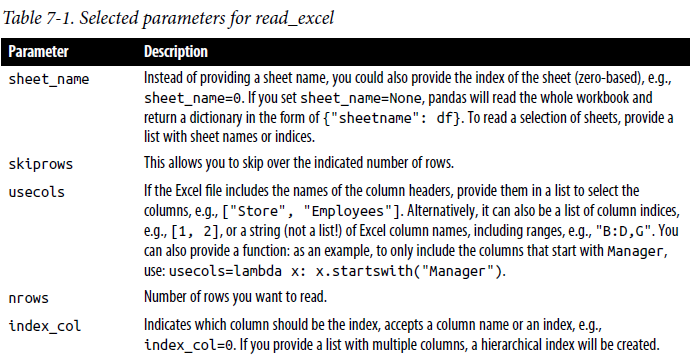
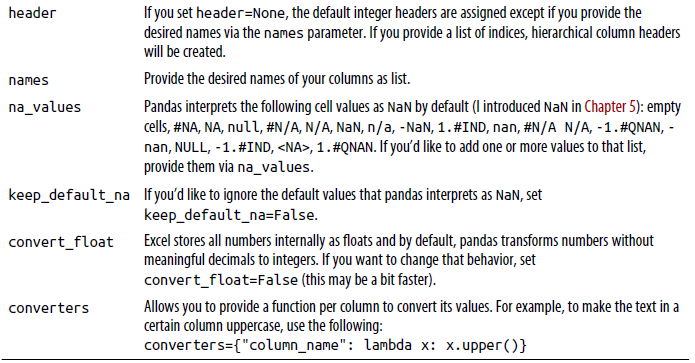

## to_excel method and ExcelWriter Class 

In [36]:
import numpy as np
import datetime as dt

In [38]:
data=[[dt.datetime(2020,1,1,10,13),2.222,1,True],
        [dt.datetime(2020,1,2), np.nan, 2, False],
        [dt.datetime(2020,1,2), np.inf, 3, True]]
df = pd.DataFrame(data=data, columns=['Dates','Float','Integers','Booleans'])
df.index.name='index'
df


,Dates,Float,Integers,Booleans
index,,,,
0,2020-01-01 10:13:00,2.222,1,True
1,2020-01-02 00:00:00,NaN,2,False
2,2020-01-02 00:00:00,inf,3,True


In [40]:
df.to_excel('written_with_pandas.xlsx',sheet_name='Output',
           startrow=1, startcol=1, index=True, header=True,
           na_rep='<NA>', inf_rep='INF>')

In [41]:
with pd.ExcelWriter('written_with_pandas2.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', startrow=1, startcol=1)
    df.to_excel(writer, sheet_name='Sheet1',startrow=10,startcol=1)
    df.to_excel(writer, sheet_name='Sheet2')

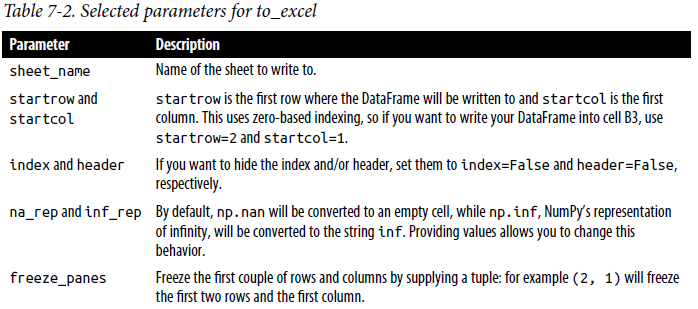